<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,57.789130,72.487971,-96.968275,43.308827,154.720421,-111.411594
1,0.0,1.0,89.808727,33.109117,7.076380,139.994225,129.863755,10.130470
2,0.0,2.0,59.020735,77.272797,78.121206,224.414738,163.637957,60.776780
3,0.0,3.0,49.674253,47.051150,-41.244132,65.481271,105.508848,-40.027576
4,0.0,4.0,88.975345,22.913762,11.288222,133.177328,112.924409,20.252920
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.238575,68.420943,135.422658,281.082176,152.743140,128.339036
19996,999.0,16.0,78.082061,81.731396,8.998793,178.812249,176.289097,2.523153
19997,999.0,17.0,52.274649,86.716455,79.943725,228.934829,150.625683,78.309146
19998,999.0,18.0,46.231924,37.844244,-25.123355,68.952813,103.159272,-34.206459


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,57.789130,72.487971,-96.968275,43.308827,154.720421,-111.411594
1,0.0,1.0,89.808727,33.109117,7.076380,139.994225,129.863755,10.130470
2,0.0,2.0,59.020735,77.272797,78.121206,224.414738,163.637957,60.776780
3,0.0,3.0,49.674253,47.051150,-41.244132,65.481271,105.508848,-40.027576
4,0.0,4.0,88.975345,22.913762,11.288222,133.177328,112.924409,20.252920
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.238575,68.420943,135.422658,281.082176,152.743140,128.339036
19996,999.0,16.0,78.082061,81.731396,8.998793,178.812249,176.289097,2.523153
19997,999.0,17.0,52.274649,86.716455,79.943725,228.934829,150.625683,78.309146
19998,999.0,18.0,46.231924,37.844244,-25.123355,68.952813,103.159272,-34.206459


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    57.789130  72.487971  -96.968275   43.308827  154.720421   
      1.0    89.808727  33.109117    7.076380  139.994225  129.863755   
      2.0    59.020735  77.272797   78.121206  224.414738  163.637957   
      3.0    49.674253  47.051150  -41.244132   65.481271  105.508848   
      4.0    88.975345  22.913762   11.288222  133.177328  112.924409   
...                ...        ...         ...         ...         ...   
999.0 15.0   67.238575  68.420943  135.422658  281.082176  152.743140   
      16.0   78.082061  81.731396    8.998793  178.812249  176.289097   
      17.0   52.274649  86.716455   79.943725  228.934829  150.625683   
      18.0   46.231924  37.844244  -25.123355   68.952813  103.159272   
      19.0   77.186937  34.024880  -25.902197   95.309619  135.731133   

                  e_hat  
rep   index              
0.0   0.0   -111.411594  
      1.0     10.130470  
      2.0     60.776780  
      3.0    -40.027576  
      4.0     20.252920  
...                 ...  
999.0 15.0   128.339036  
      16.0     2.523153  
      17.0    78.309146  
      18.0   -34.206459  
      19.0   -40.421514  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    57.789130  72.487971  -96.968275   43.308827  154.720421   
      1.0    89.808727  33.109117    7.076380  139.994225  129.863755   
      2.0    59.020735  77.272797   78.121206  224.414738  163.637957   
      3.0    49.674253  47.051150  -41.244132   65.481271  105.508848   
      4.0    88.975345  22.913762   11.288222  133.177328  112.924409   
...                ...        ...         ...         ...         ...   
999.0 15.0   67.238575  68.420943  135.422658  281.082176  152.743140   
      16.0   78.082061  81.731396    8.998793  178.812249  176.289097   
      17.0   52.274649  86.716455   79.943725  228.934829  150.625683   
      18.0   46.231924  37.844244  -25.123355   68.952813  103.159272   
      19.0   77.186937  34.024880  -25.902197   95.309619  135.731133   

                  e_hat  
rep   index              
0.0   0.0   -111.411594  
      1.0     10.130470  
      2.0     60.776780  
      3.0    -40.027576  
      4.0     20.252920  
...                 ...  
999.0 15.0   128.339036  
      16.0     2.523153  
      17.0    78.309146  
      18.0   -34.206459  
      19.0   -40.421514  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,57.789130,72.487971,-96.968275,43.308827,154.720421,-111.411594
1,0.0,1.0,89.808727,33.109117,7.076380,139.994225,129.863755,10.130470
2,0.0,2.0,59.020735,77.272797,78.121206,224.414738,163.637957,60.776780
3,0.0,3.0,49.674253,47.051150,-41.244132,65.481271,105.508848,-40.027576
4,0.0,4.0,88.975345,22.913762,11.288222,133.177328,112.924409,20.252920
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,67.238575,68.420943,135.422658,281.082176,152.743140,128.339036
19996,999.0,16.0,78.082061,81.731396,8.998793,178.812249,176.289097,2.523153
19997,999.0,17.0,52.274649,86.716455,79.943725,228.934829,150.625683,78.309146
19998,999.0,18.0,46.231924,37.844244,-25.123355,68.952813,103.159272,-34.206459


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    57.789130  72.487971  -96.968275   43.308827  154.720421   
      1.0    89.808727  33.109117    7.076380  139.994225  129.863755   
      2.0    59.020735  77.272797   78.121206  224.414738  163.637957   
      3.0    49.674253  47.051150  -41.244132   65.481271  105.508848   
      4.0    88.975345  22.913762   11.288222  133.177328  112.924409   
...                ...        ...         ...         ...         ...   
999.0 15.0   67.238575  68.420943  135.422658  281.082176  152.743140   
      16.0   78.082061  81.731396    8.998793  178.812249  176.289097   
      17.0   52.274649  86.716455   79.943725  228.934829  150.625683   
      18.0   46.231924  37.844244  -25.123355   68.952813  103.159272   
      19.0   77.186937  34.024880  -25.902197   95.309619  135.731133   

                  e_hat  
rep   index              
0.0   0.0   -111.411594  
      1.0     10.130470  
      2.0     60.776780  
      3.0    -40.027576  
      4.0     20.252920  
...                 ...  
999.0 15.0   128.339036  
      16.0     2.523153  
      17.0    78.309146  
      18.0   -34.206459  
      19.0   -40.421514  

[20000 rows x 6 columns]

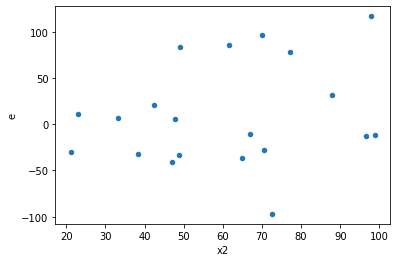

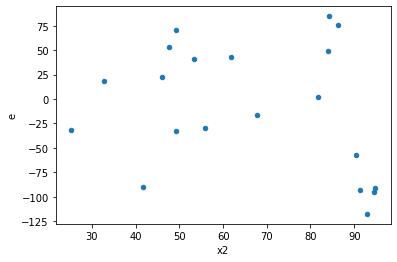

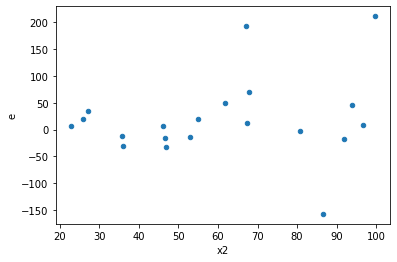

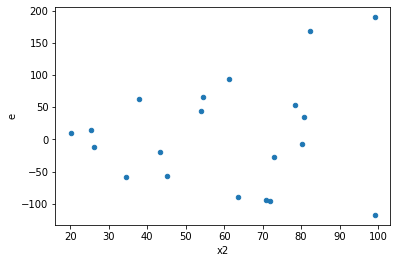

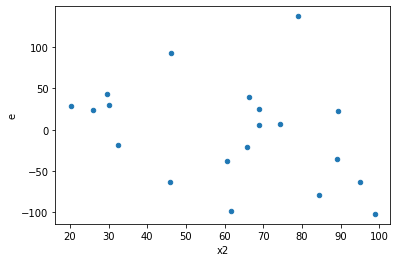

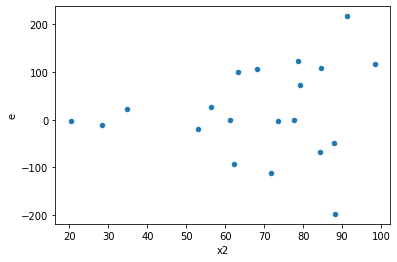

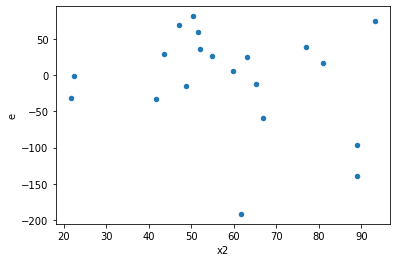

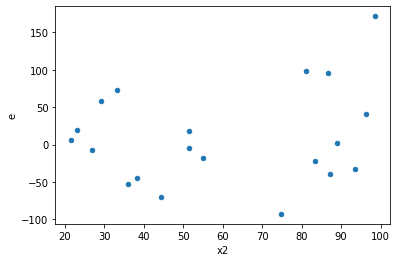

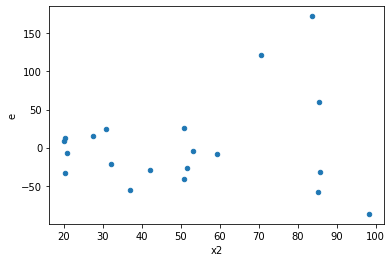

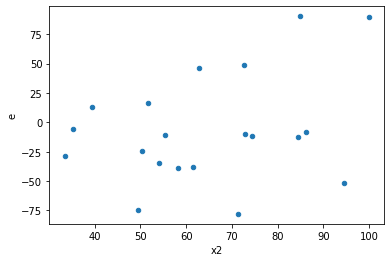

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,7146.4964859152105,21655.279911263802,1191.082747652535,3609.213318543967,3.030195278755606,0.2031000033342183,0.8984499983328909,0.10155000166710915,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,12426.852999256918,13855.37193626452,2071.1421665428197,2309.2286560440866,1.1149541993530478,0.8982885798263025,0.5508557100868487,0.44914428991315125,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,22616.19147515516,51352.98508194033,3769.3652458591932,8558.830846990055,2.2706292143995044,0.3415443635851254,0.8292278182074373,0.1707721817925627,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,15316.421231737857,47884.90014539763,2552.7368719563096,7980.816690899605,3.1263765484702875,0.19121137695002877,0.9043943115249856,0.09560568847501438,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,16524.170442569128,16967.858077701,2754.0284070948546,2827.9763462835,1.0268508265921086,0.9751637322378728,0.5124181338810636,0.4875818661189364,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,11324.927878339044,93684.47695245533,1887.487979723174,15614.079492075887,8.272412677492074,0.02120388918423366,0.9893980554078832,0.01060194459211683,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,22256.991629468837,23604.94617835079,3709.4986049114727,3934.1576963917983,1.0605631961103505,0.9449225280420832,0.5275387359789584,0.4724612640210416,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,13286.454249167513,37467.70349464869,2214.409041527919,6244.617249108115,2.819992662601935,0.23265724823910894,0.8836713758804455,0.11632862411955447,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,1833.3761882091974,43439.71791386667,305.56269803486623,7239.952985644445,23.693837736759118,0.0012488289934531327,0.9993755855032734,0.0006244144967265663,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,7146.4964859152105,21655.279911263802,1191.082747652535,3609.213318543967,3.030195278755606,0.2031000033342183,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,12426.852999256918,13855.37193626452,2071.1421665428197,2309.2286560440866,1.1149541993530478,0.8982885798263025,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,22616.19147515516,51352.98508194033,3769.3652458591932,8558.830846990055,2.2706292143995044,0.3415443635851254,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,15316.421231737857,47884.90014539763,2552.7368719563096,7980.816690899605,3.1263765484702875,0.19121137695002877,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,16524.170442569128,16967.858077701,2754.0284070948546,2827.9763462835,1.0268508265921086,0.9751637322378728,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,11324.927878339044,93684.47695245533,1887.487979723174,15614.079492075887,8.272412677492074,0.02120388918423366,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,22256.991629468837,23604.94617835079,3709.4986049114727,3934.1576963917983,1.0605631961103505,0.9449225280420832,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,13286.454249167513,37467.70349464869,2214.409041527919,6244.617249108115,2.819992662601935,0.23265724823910894,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,1833.3761882091974,43439.71791386667,305.56269803486623,7239.952985644445,23.693837736759118,0.0012488289934531327,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      739
Reject005=0 : Heteroscedasticity    261
Name: Result_test, dtype: int64